<a href="https://colab.research.google.com/github/hardikdhamija96/netflix-asset/blob/main/Netflix_Ayush_Krishan_Negi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Netflix - Data Exploration and Visualisation**
                                              by AYUSH KRISHAN NEGI

**1.	Defining Problem Statement and Analysing basic metrics (10 Points).**

The Netflix dataset showcases 12 columns where each column play a significant role. However, dataset has nan values throughout the rows/columns which are needed to be filled.
Certain cells have multiple values, which are needed to be unnest.
Moreover, having separate tables for a movie and TV show is a good option. The dataset has 12 columns, all are of object data type except for the  release_year column which is of int data type. Total number of rows are 8807.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
netflix = pd.read_csv('netflix.csv')
!pip install nbconvert

2.**Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category'
(If required), missing value detection, statistical summary (10 Points).**




In [ ]:
netflix.info()
print("\n")
netflix.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




(8807, 12)

3. **Non-Graphical Analysis: Value counts and unique attributes (10 Points)
Movies and TV Shows**

In [ ]:
netflix['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
#Movies and TV Show Rating
netflix['rating'].value_counts()


,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


**Number of Movies produced in each country and picking the top 10**
**countries.**

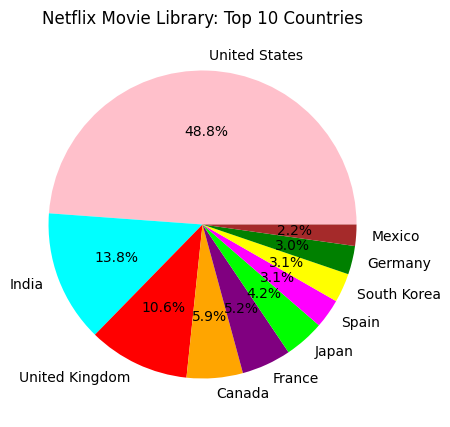

In [ ]:
top_country= b.groupby("country")[['title']].count().sort_values(by='title', ascending= False).reset_index()
top_cntry= top_country[top_country['country']!='unknown_country'].head(10)
top_cntry
plt.figure(figsize=(5, 5))
plt.pie(top_cntry['title'], labels=top_cntry['country'], autopct='%1.1f%%', colors = ['pink', 'cyan', 'red', 'orange', 'purple', 'lime', 'magenta', 'yellow', 'green', 'brown'])
plt.title("Netflix Movie Library: Top 10 Countries")
plt.show()

**Number of TV Shows produced in each country and picking the top 10
countries.**

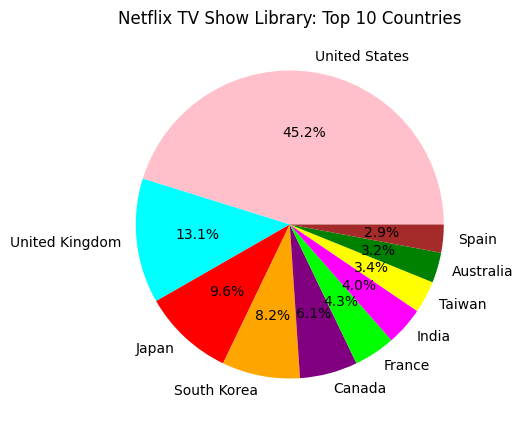

In [ ]:

lis1 = netflix[netflix['type']=='TV Show'][['country','title','type']]
top1_ = lis1['country'].apply(lambda x: x.split(", ")).tolist()
ck1 =pd.DataFrame(top1_,index= lis1['title'])
pk1 =ck1.stack().reset_index().drop(columns=['level_1']).rename(columns = {0:'country'}) #country is unnested here
top_tv= pk1.groupby("country")[['title']].count().sort_values(by='title', ascending= False).reset_index()
top_tv= top_tv[top_tv['country']!='unknown_country'].head(10)
plt.figure(figsize=(5, 5))
plt.pie(top_tv['title'], labels=top_tv['country'], autopct='%1.1f%%', colors = ['pink', 'cyan', 'red', 'orange', 'purple', 'lime', 'magenta', 'yellow', 'green', 'brown'])
plt.title("Netflix TV Show Library: Top 10 Countries")
plt.show()

In [ ]:
# TOP 10 Movies Director
netflix['director'] = netflix['director'].fillna("Unknown_dir")
d = netflix['director'].apply(lambda x: x.split(", ")).tolist()
dir=pd.DataFrame(d,index= netflix['title'])
dir= dir.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'director'}) #director is unnested here
tot= dir.merge(netflix, on= 'title')
movie_df= tot[tot['type'] == 'Movie']
top_dir_movies= movie_df.groupby("director_x")['title'].count().reset_index().sort_values(by='title',ascending= False).rename(columns={'director_x':'director', 'title':'count'})
top_dir_movies[top_dir_movies['director']!= 'Unknown_dir'].head(10)#Top 10 director


,director,count
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
4726,Youssef Chahine,12
2815,Martin Scorsese,12
1859,Jay Chapman,12


In [ ]:
#Top 10 Directors of TV Show
netflix['director'] = netflix['director'].fillna("Unknown_dir")
d = netflix['director'].apply(lambda x: x.split(", ")).tolist()
dir=pd.DataFrame(d,index= netflix['title'])
dir= dir.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'director'}) #director is unnested here
tv= dir.merge(netflix, on= 'title')
tv_df= tv[tv['type'] == 'TV Show']
top_dir_tv= tv_df.groupby("director_x")['title'].count().reset_index().sort_values(by='title',ascending= False).rename(columns={'director_x':'director', 'title':'count'})
top_dir_tv[top_dir_tv['director']!= 'Unknown_dir'].head(10) #top 10 directors who have appeared in most movies or TV shows.


,director,count
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
251,Shin Won-ho,2
168,Lynn Novick,2
128,Joe Berlinger,2
140,Jung-ah Im,2
235,Rob Seidenglanz,2


In [ ]:
#Top 10 Actors with most number of Movies/TV Show
netflix['cast'] = netflix['cast'].fillna("cast_unknown")
e = netflix['cast'].apply(lambda x:x.split(", ")).tolist()

cast_= pd.DataFrame(e, index= netflix['title'])
cast_= cast_.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'cast'}) #cast is unnested here
cast_[~(cast_['cast'] == 'cast_unknown')].groupby('cast').count().sort_values(by= 'title', ascending= False).head(10)


,title
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29


Text(0.5, 1.0, 'Netflix Popular Genre:TV Show')

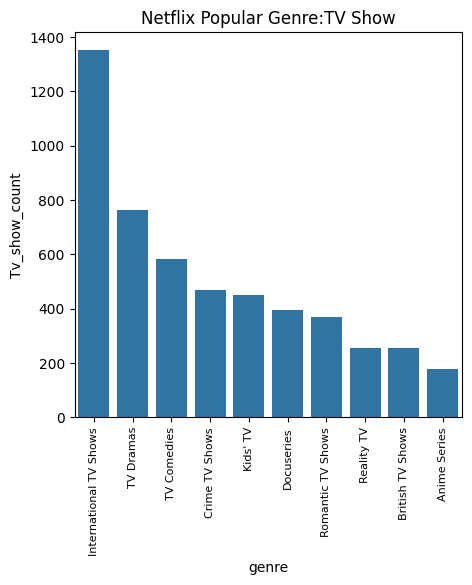

In [ ]:
#Most Popular Genre: TV Show
netflx_tv= netflix[netflix['type']=='TV Show'].copy()
netflx_tv['listed_in'] = netflx_tv['listed_in'].astype(str)
tv_ = netflx_tv['listed_in'].apply(lambda x: x.split(", ")).tolist()
ct= pd.DataFrame(tv_, index= netflx_tv['title'])
ct= ct.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'genre','title':'Tv_show_count'}) #listed_in is unnested here
top_genre_tvshow = ct.groupby('genre')['Tv_show_count'].count().sort_values(ascending= False).reset_index()
plt.figure(figsize=(5, 5))
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='genre',y='Tv_show_count', data= top_genre_tvshow.head(10))
plt.title("Netflix Popular Genre:TV Show")


Text(0.5, 1.0, 'Netflix Popular Genre: Movies')

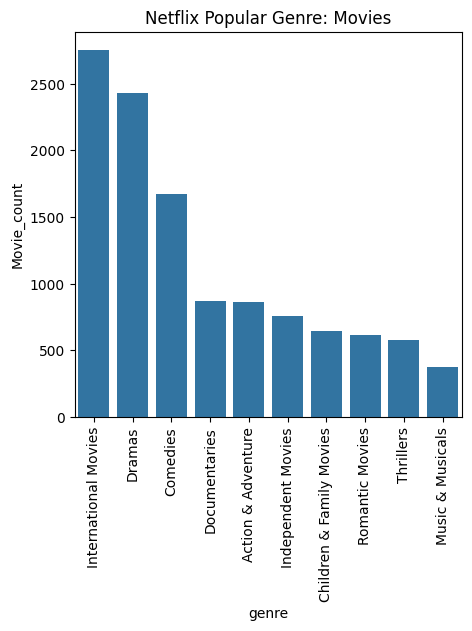

In [ ]:
#Most Popular Genre: Movies
netflx= netflix[netflix['type']=='Movie'].copy()
netflx['listed_in'] = netflx['listed_in'].astype(str)
mov = netflx['listed_in'].apply(lambda x: x.split(", ")).tolist()
c= pd.DataFrame(mov, index= netflx['title'])
c= c.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'genre','title':'Movie_count'}) #listed_in is unnested here
top_genre_movie = c.groupby('genre')['Movie_count'].count().sort_values(ascending= False).reset_index()
plt.figure(figsize=(5, 5))
plt.xticks(rotation=90, fontsize=10)
sns.barplot(x='genre',y='Movie_count', data= top_genre_movie.head(10))
plt.title("Netflix Popular Genre: Movies")


**Visual Analysis - Univariate, Bivariate after pre-processing of the data**

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country


In [ ]:
#>> Country Column Unnesting 4.a
a= netflix['country'].apply(lambda x: x.split(", ")).tolist()
country_unnest =pd.DataFrame(a,index= netflix['title'])
country_unnest= country_unnest.stack().reset_index().drop(columns=['level_1']).rename(columns = {0:'country'})
country_unnest['country'].fillna("unknown_country",inplace= True)
country_unnest.head(10)
#Movie title with multiple country has been unnested and the empty cell is filled with “unknown_country”.


<ipython-input-19-2953b4837e2c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_unnest['country'].fillna("unknown_country",inplace= True)


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,unknown_country
3,Jailbirds New Orleans,unknown_country
4,Kota Factory,India
5,Midnight Mass,unknown_country
6,My Little Pony: A New Generation,unknown_country
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [ ]:
#>> Listed_in column unnesting 4.b
netflix['listed_in'] = netflix['listed_in'].astype(str)
mov = netflix['listed_in'].apply(lambda x: x.split(", ")).tolist()
genre_unnest = pd.DataFrame(mov,index= netflix['title'])
genre_unnest = genre_unnest.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'genre'}) #listed_in is unnested here
genre_unnest
#>> The listed_in column which had multiple values has now been unnested into separate rows.

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
#>> Cast Column Unnested 4.c
netflix['cast'] = netflix['cast'].fillna("cast_unknown")
e = netflix['cast'].apply(lambda x:x.split(", ")).tolist()
cast_= pd.DataFrame(e, index= netflix['title'])
cast_= cast_.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'cast'}) #cast is unnested here
cast_
#>> Multiple cast for the same title/movie has been unnested. Empty cells in cast column has been filled with cast_unknown.

,title,cast
0,Dick Johnson Is Dead,cast_unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
#>> Director Column Unnested 4.d
netflix['director'] = netflix['director'].fillna("Unknown_dir")
d = netflix['director'].apply(lambda x: x.split(", ")).tolist()
dir=pd.DataFrame(d,index= netflix['title'])
dir= dir.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'director'}) #director is unnested here
dir
#Movies with multiple directors have been unnested and the empty cell has been filled with “unknown_dir”.

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown_dir
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown_dir
4,Kota Factory,Unknown_dir
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Unknown_dir
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
#Date_Added Column Unnesting 4.e
flix= netflix[netflix['type']== 'TV Show'].copy()
flix=flix[['title', 'type','date_added']]
tv_split= flix['date_added'].astype('str').apply(lambda x: x.split(" ")).to_list()
date_df = pd.DataFrame(tv_split, index= flix['title']).rename(columns={0:"Month",1:"Date",2:"Year"}).drop(columns=3).reset_index()
date_df
#>> Date_Added column has been unnested and made into 3 columns (Month, Date and Year).


,title,Month,Date,Year
0,Blood & Water,September,"24,",2021
1,Ganglands,September,"24,",2021
2,Jailbirds New Orleans,September,"24,",2021
3,Kota Factory,September,"24,",2021
4,Midnight Mass,September,"24,",2021
...,...,...,...,...
2671,Yu-Gi-Oh! Arc-V,May,"1,",2018
2672,Yunus Emre,January,"17,",2017
2673,Zak Storm,September,"13,",2018
2674,Zindagi Gulzar Hai,December,"15,",2016


**4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)**

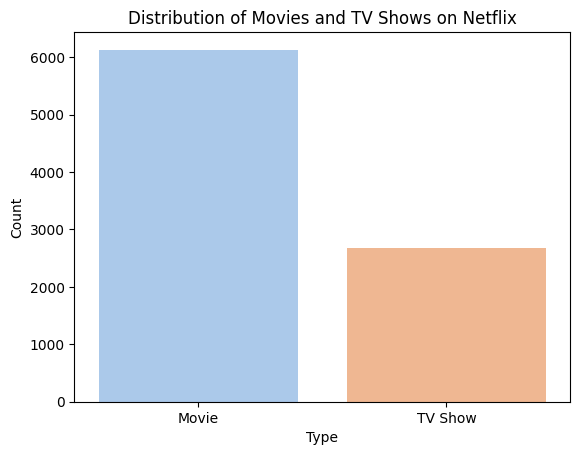

In [ ]:
#>> 4.1.a Distribution of Movies and TV Shows on Netflix (Countplot)
pt = sns.countplot(data=netflix, x='type', hue='type', palette='pastel', legend=False)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.show()


Text(0.5, 1.0, 'Rating Distribution Among TV Shows')

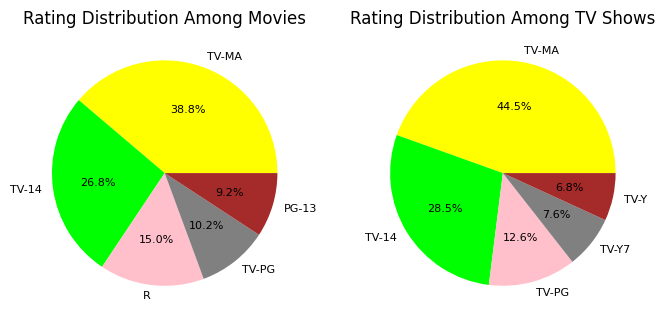

In [ ]:
#>> 4.1.b Rating Distribution among Movies and TV shows
pq = netflix.loc[netflix['type'] == 'Movie']
pq = pq['rating'].value_counts().reset_index().head(5)

tq = netflix.loc[netflix['type'] == 'TV Show']
tq = tq['rating'].value_counts().reset_index().head(5)

colors = ['yellow', 'lime', 'pink', 'gray', 'brown', 'teal', 'gold', 'blue', 'red', 'orange',
          'purple', 'cyan', 'magenta', 'green']
fig, axes = plt.subplots(1, 2, figsize=(8, 8))  # 1 row, 2 columns layout

# Pie chart for Movies
axes[0].pie(pq['count'], labels=pq['rating'], autopct='%1.1f%%', colors=colors, textprops={'fontsize': 8})
axes[0].set_title("Rating Distribution Among Movies")

# Pie chart for TV Shows
axes[1].pie(tq['count'], labels=tq['rating'], autopct='%1.1f%%', colors=colors, textprops={'fontsize': 8})
axes[1].set_title("Rating Distribution Among TV Shows")


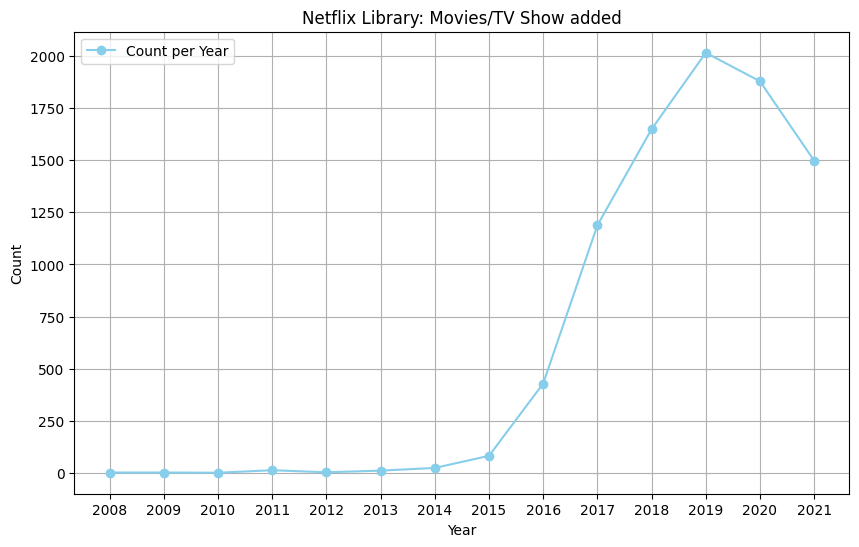

In [ ]:
#4.1.c Movies/TV Show Added per Year
pqr= netflix['date_added'].astype('str').apply(lambda x: x.split()).to_list()
rs= pd.DataFrame(pqr, index= netflix[['title','type']])
rs= rs[2].value_counts().reset_index().sort_values(by=2)
plt.figure(figsize=(10,6))
plt.plot(rs[2],rs['count'], marker='o', linestyle='-', color='skyblue', label='Count per Year')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Netflix Library: Movies/TV Show added")
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
#4.1.d Movies/TV Shows Genre added in 2019
# for listed in column: GENRE
netflix['listed_in'] = netflix['listed_in'].astype(str)
mov = netflix['listed_in'].apply(lambda x: x.split(", ")).tolist()
genre_unnest = pd.DataFrame(mov,index= netflix['title'])
genre_unnest = genre_unnest.stack().reset_index().drop(columns=['level_1']).rename(columns= {0:'genre'}) #listed_in is unnested here
genre_unnest

pqr= netflix['date_added'].astype('str').apply(lambda x: x.split()).to_list()
rs= pd.DataFrame(pqr, index= netflix['title'])

rs= rs.reset_index()[['title',2]].rename(columns={2:'year'})
rs= rs.merge(genre_unnest, on='title')[['year','genre']]
rs[rs['year']== '2019'].drop_duplicates() # what kind of genre movies were added in 2019


,year,genre
6835,2019,Horror Movies
6836,2019,International Movies
6837,2019,Thrillers
6838,2019,Dramas
6839,2019,Independent Movies
6841,2019,Docuseries
6842,2019,International TV Shows
6843,2019,Comedies
6844,2019,Sports Movies
6847,2019,TV Dramas


**4.2 For categorical variable(s): Boxplot (10 Points)**

<ipython-input-29-7b490a896094>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='Movie_duration(mins)', data=mv_pd, palette="coolwarm")


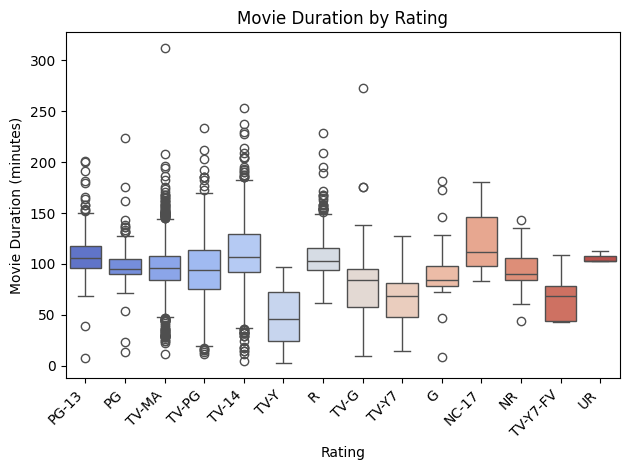

In [ ]:

#4.2.a Boxplot for Movie duration and Rating
nf= netflix[netflix['type']== 'Movie'].copy()
nf=nf[['rating','duration']]
mv_box= nf['duration'].astype(str).apply(lambda x:x.split(" ")).tolist()
mv_pd= pd.DataFrame(mv_box, index=nf['rating']).drop(columns=1).rename(columns={0:"Movie_duration(mins)"}).reset_index()
mv_pd= mv_pd[~(mv_pd['Movie_duration(mins)']== "nan")]
mv_pd['Movie_duration(mins)']= mv_pd['Movie_duration(mins)'].astype(int)

sns.boxplot(x='rating', y='Movie_duration(mins)', data=mv_pd, palette="coolwarm")

plt.title('Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # to prevent labels from overlapping
plt.show()


# **4.3 For correlation: a-Heatmaps, b-Pairplots (10 Points)**

<Axes: >

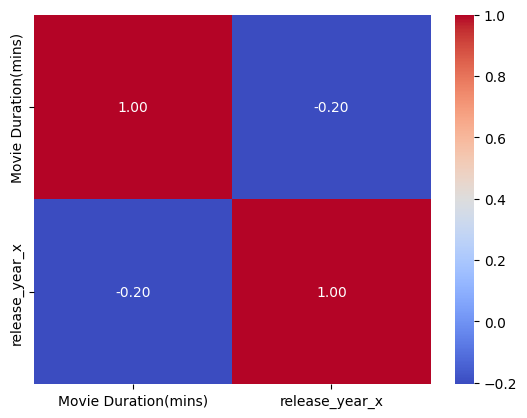

In [ ]:
# Heat Map for Movies
flp=netflix[netflix['type']== 'Movie'].copy()# for movies
flp=flp[['title', 'type','duration']]
mv_split= flp['duration'].astype('str').apply(lambda x: x.split(" ")).to_list()
mv_df = pd.DataFrame(mv_split, index= flp['title']).drop(columns=1).rename(columns= {0:'mins'}).reset_index()

date_df= netflix[netflix['type']=='Movie'][['title','release_year']]

mv_df= mv_df.merge(date_df, on='title')
mv_df= mv_df.merge(netflix[['title', 'release_year']], on='title').drop(columns=['title','release_year_y'])

mv_df = mv_df[~(mv_df['mins'] == 'nan')].copy()
mv_df['mins'] = mv_df['mins'].astype(int)
mv_df= mv_df.rename(columns= {'mins':'Movie Duration(mins)'})
mv_df
sns.heatmap(mv_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


# **Pair Plot**

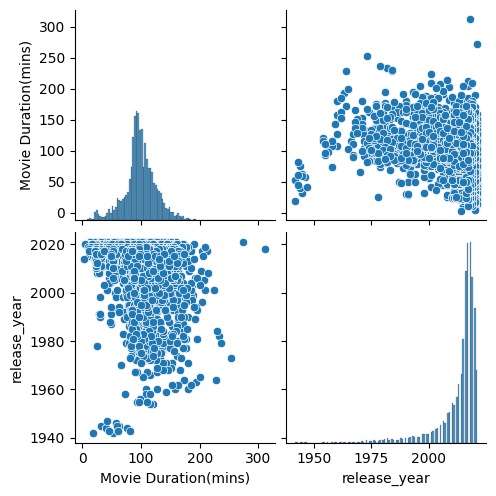

In [ ]:
flik =netflix[netflix['type']== 'Movie'].copy()# for movies
flik= flik[['title', 'type','duration', 'release_year']]
mv_dr= flik['duration'].astype('str').apply(lambda x: x.split(" ")).to_list()
mv_dr = pd.DataFrame(mv_dr, index= flik['title']).drop(columns=1).rename(columns= {0:'mins'}).reset_index()

date_df= netflix[netflix['type']=='Movie'][['title','release_year']]

mv_dr= mv_dr.merge(netflix[['title', 'release_year']], on='title')
mv_dr = mv_dr[~(mv_dr['mins'] == 'nan')].copy()
mv_dr['mins'] = mv_dr['mins'].astype(int)
mv_dr= mv_dr.rename(columns= {'mins':'Movie Duration(mins)'}).drop(columns='title')
sns.pairplot(mv_dr)

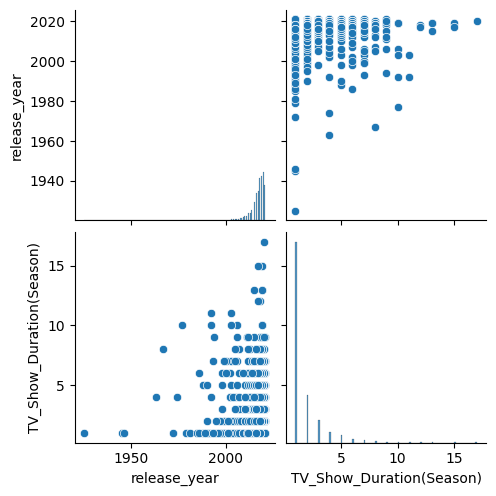

In [ ]:
tvflix =netflix[netflix['type']== 'TV Show'].copy()
tvflix=tvflix[['duration','release_year']]
tv_split= tvflix['duration'].astype('str').apply(lambda x: x.split(" ")).to_list()
tv_sh= pd.DataFrame(tv_split, index=tvflix['release_year'])
tv_sh= tv_sh.drop(columns=1).rename(columns= {0:'TV_Show_Duration(Season)'}).reset_index()
tv_sh['TV_Show_Duration(Season)']= tv_sh['TV_Show_Duration(Season)'].astype(int)
sns.pairplot(tv_sh)


## **5. Missing Value & Outlier check (Treatment optional) (10 Points)**

NAN values in the data 5.1.a

In [ ]:
def is_null(x):
  return  sum(x.isnull())
netflix.apply(is_null, axis=0)


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#>> 6.1.b Duration of Movies in Netflix library
mv_dur= netflix[netflix['type']=='Movie']
mv_dur= mv_dur['duration'].astype(str).apply(lambda x:x.split()).to_list()
dur_mv= pd.DataFrame(mv_dur, index= netflix[netflix['type']=='Movie']['title'])
dur_mv[~(dur_mv[0]=='nan')][0].astype(int).agg(['min','max'])


,0
min,3
max,312


In [ ]:
#>> 6.1.c Duration of TV in Netflix Library
mv_dur= netflix[netflix['type']=='TV Show']
mv_dur= mv_dur['duration'].astype(str).apply(lambda x:x.split()).to_list()
dur_mv= pd.DataFrame(mv_dur, index= netflix[netflix['type']=='TV Show']['title'])
dur_mv[~(dur_mv[0]=='nan')].agg(['min','max'])


,0,1
min,1,Season
max,9,Seasons


# **6.2 Comments on the distribution of the variables and relationship between them.**


# 6.3	Comments for each univariate and bivariate plot
•	The univariate plot for TV Show: Genre shows various genre in Netflix library for TV shows. Among them, International TV Shows genre has the highest number of shows followed by TV Dramas, TV Comedies, Crime, TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows, Anime Series and others.

•	Similarly, The univariate plot for Movies: Genre shows various genre in Netflix library for Movies. Among them, the most produced movie genre is International Movies (2752) followed by Dramas (2427), Comedies (1674), Documentaries (869), Action & Adventure (859), Independent Movies, Children & Family Movies, Romantic Movies, Thrillers and more.

•	The univariate plot for Netflix TV Show Library: Top 10 Countries depicts USA hold more number of movies followed by UK, Japan, South Korea, Canada, France and others.

•	The univariate plot for Netflix Movie Library: Top 10 Countries depicts USA hold more number of movies followed by India, UK, Canada, France, Japan, Spain, South Korea and others.

•	The bivariate plot between Movies and release_year shows:
Rating Distribution: **bold text**
o	Most content has a TV-MA rating, meaning Netflix focuses more on mature audiences.

**Movies vs. TV Shows:**
o	There are twice as many movies as TV shows in Netflix’s library, indicating a strong focus on films.

**The bivariate pairplot in Netflix’s TV show data—release year vs season count show**

TV shows released in later years tend to have more seasons.The scatter plot shows that modern shows generally have longer runs. Most TV shows have fewer seasons. The histogram indicates that 1–2 seasons are the most common. The number of TV shows released increased after 1950, peaking after 2000. The release year histogram suggests Netflix has more recent content.


# **7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.**

Netflix movies can be as short as 10 minutes or as long as 312 minutes.
Netflix TV shows have between 1 and 9 seasons.

Netflix has movies and TV shows from 1925 to 2021 in its library.
The lineplot between movies added yearly shows that in 2019, Netflix added nearly 2000 new movies and TV shows.

•	In 2020, they added about 1900.

•	In 2021, they added around 1500.

•	The number of new additions has decreased after 2019.

**Most Netflix content has a TV-MA rating, meaning it is made for mature audiences.**

**INSIGHTS from Countplot**
The countplot shows distribution of movies and TV shows on Netflix. Hence, Movies are almost twice in number than TV Shows in the Netflix library.

**INSIGHTS from the Heatmap**
The Heatmap between movie duration (mins) and release year have a weak negative correlation (-0.20). This means that as the release year increases, movie durations slightly tend to decrease. Since the correlation is weak, this trend is not very strong—some newer movies might still be long.

**INSIGHTS from Box Whisker Plot**
TV-Y movies (for young kids) are generally short, designed for their attention spans.
TV-MA movies (for mature audiences) vary greatly in length, ranging from short to very long.
R-rated movies and some TV ratings show high variation, meaning they can be both short and long, depending on the content and storytelling style.


# **8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand**

**What the data suggests:**
1.	TV-MA rated movies should be made more since they are the most common, followed by TV-14, TV-PG, and R-rated movies.

2.	TV Shows should be produced in genres like Dramas, Comedy, Crime, Kids TV, Docuseries, Romantic, and Reality TV.

3.	Movies should be made in genres like Dramas, Comedy, Documentaries, Action & Adventure, Independent films, Romantic, Thriller, Music, and Musicals.

**What Netflix should add to its library:**
4.	More movies from the USA, India, and UK.

5.	More TV Shows from the USA, UK, Japan, and South Korea.

6.	Movies directed by: Rajiv Chilaka, Jan Suter, Raul Campos, Suhas Kadav, Marcus Raboy, and Jay Karas.

7.	TV Shows directed by: Ken Burns, Alastair Fothergill, Stan Lathan, Hsu Fu-chun, Gautham Vasudev Menon, and Shin Won-Ho.

8.  Movies featuring famous actors like Anupam Kher, Shah Rukh Khan, Julie Tejwani, Takahiro Sakurai, Naseeruddin Shah, Rupa Bhimani, and Akshay Kumar.

**Netflix’s growth trend:**
9.	Netflix needs to add more movies and TV shows every year to keep a steady collection. The number of new movies and TV shows decreased after 2019.In 2019, the most added genres were Horror, Dramas, Comedy, Thriller, Docuseries, Action & Adventure, and Anime.
